In [63]:
TEST = False

In [64]:
train_path = [
    'D:/uni/master/data/YAGO39K/Train/triple2id.tsv',
    'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv',
    'D:/uni/master/data/YAGO39K/Train/subClassOf2id.tsv'
]
val_path =  [
    'D:/uni/master/data/YAGO39K/Valid/triple2id_positive.tsv',
    'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv',
    'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_positive.tsv'
]
neg_val_path = [
    'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv',
    'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv',
    'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_negative.tsv'
]

test_path =  [
    'D:/uni/master/data/YAGO39K/Test/triple2id_positive.tsv',
    'D:/uni/master/data/YAGO39K/Test/instanceOf2id_positive.tsv',
    'D:/uni/master/data/YAGO39K/Test/subClassOf2id_positive.tsv'
]

neg_test_path = [
    'D:/uni/master/data/YAGO39K/Test/triple2id_negative.tsv',
    'D:/uni/master/data/YAGO39K/Test/instanceOf2id_negative.tsv',
    'D:/uni/master/data/YAGO39K/Test/subClassOf2id_negative.tsv'
]



In [65]:
if TEST:
    output_directory = 'D:/uni/master/models/test/'
    train_path = [
        'D:/uni/master/data/debug/triple2id.tsv'
    ]
    test_path =  [
        'D:/uni/master/data/debug/triple2id_positive_test.tsv'
]

Check which hyper-parameters are required by Region:

In [66]:
from pykeen.kge_models import Region
Region.hyper_params

['embedding_dim',
 'margin_loss',
 'learning_rate',
 'normalization_of_entities',
 'init_radius']

Train and evaluate Region (provide test set):
* Define the path to our test set: **test_set_path**
* Define the path to our the negative test set: **neg_test_path** in case of triple classfication evaluation
* Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

{'training_set_path': 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'test_set_path': 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv', 'neg_test_set_path': 'D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'execution_mode': 'HPO_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 50, 'normalization_of_entities': 2, 'init_radius': 10, 'reg_lambda': 0.1, 'margin_loss': 0, 'learning_rate': 2, 'num_epochs': 30, 'batch_size': 1024, 'test_batch_size': 1024, 'filter_negative_triples': True, 'maximum_number_of_hpo_iters': 20, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 46100, 'num_relations': 39}

In [67]:
config = dict(
    metrics                     = ['prediction'],
    training_set_path           = train_path,
    test_set_path               = val_path,
    neg_test_set_path           = neg_val_path,
    execution_mode              = 'Training_mode',
    random_seed                 = 2,
    kg_embedding_model_name     = 'Region',
    embedding_dim               = 20,
    normalization_of_entities   = 2,
    init_radius                 = 5,
    reg_lambda                  = 0.02,
    margin_loss                 = 0,
    learning_rate               = 5,
    num_epochs                  = 100 if not TEST else 5,  
    batch_size                  = 1024,
    test_batch_size             = 4096,
    filter_negative_triples     = True,
    preferred_device            = 'gpu'
)

In [68]:
output_directory = 'D:/uni/master/models/region_dim{}_rad{}_regL{}_lr{}/'.format(
    config['embedding_dim'], config['init_radius'], 
    str(config['reg_lambda']).replace('.',''), 
    str(config['learning_rate']).replace('.',''))
output_directory

'D:/uni/master/models/region_dim20_rad5_regL002_lr5/'

In [69]:
import logging
import os
import sys
import time
import pykeen

In [70]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('pykeen').setLevel(logging.INFO)

In [71]:
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


In [72]:
print(time.asctime())

Wed Apr 24 03:02:27 2019


In [73]:
print(pykeen.get_version())

0.0.26-dev


## Train and evaluate Region:

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
%matplotlib inline

In [76]:
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

{'metrics': ['prediction'], 'training_set_path': ['D:/uni/master/data/YAGO39K/Train/triple2id.tsv', 'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv', 'D:/uni/master/data/YAGO39K/Train/subClassOf2id.tsv'], 'test_set_path': ['D:/uni/master/data/YAGO39K/Valid/triple2id_positive.tsv', 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_positive.tsv', 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_positive.tsv'], 'neg_test_set_path': ['D:/uni/master/data/YAGO39K/Valid/triple2id_negative.tsv', 'D:/uni/master/data/YAGO39K/Valid/instanceOf2id_negative.tsv', 'D:/uni/master/data/YAGO39K/Valid/subClassOf2id_negative.tsv'], 'execution_mode': 'Training_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'embedding_dim': 20, 'normalization_of_entities': 2, 'init_radius': 5, 'reg_lambda': 0.02, 'margin_loss': 0, 'learning_rate': 5, 'num_epochs': 100, 'batch_size': 1024, 'test_batch_size': 4096, 'filter_negative_triples': True, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num

INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
Training epoch:  30%|████████████                            | 30/100 [17:12<41:02, 35.18s/it]INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------

100%|███████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 40.93it/s]

[[0.76028103]
 [0.52667874]
 [0.70157737]
 ...
 [0.65605623]
 [0.64354295]
 [0.81983089]] [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 0.26s seconds


Check result entries:

In [77]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'validation_losses', 'entity_to_embedding', 'relation_to_embedding', 'eval_summary', 'entity_to_id', 'relation_to_id', 'final_configuration'])

Visualize loss values:

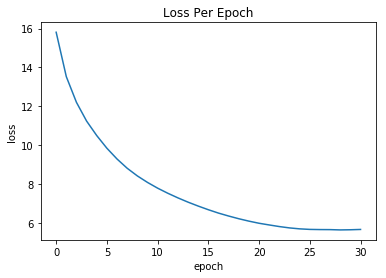

In [78]:
losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

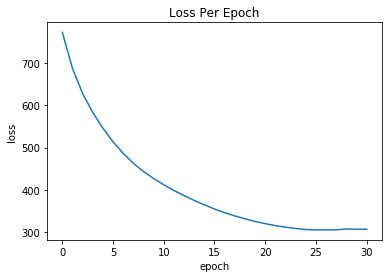

In [79]:
losses = results.results['validation_losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [80]:
results.results['eval_summary']

{'mean_rank': None,
 'hits@k': None,
 'precision': 0.5860606060606061,
 'recall': 0.7564044064924059,
 'accuracy': 0.6107577388524643,
 'f1_score': 0.6604251444182009}

## Load and evaluate

In [21]:
import torch
import json
import pykeen.constants as pkc
from pykeen.kge_models import get_kge_model
from pykeen.utilities.pipeline import Pipeline

In [30]:
#input_directory = 'D:/uni/master/models/region_hpo/'
#input_directory = 'D:/uni/master/models/region_dim50_rad10_regL01_lr2/'
input_directory = output_directory

In [31]:
results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
}

In [32]:
# Initialize KG embedding model
config = results['final_configuration']
config['training_set_path'] = train_path
config['test_set_path'] = val_path
config['neg_test_path'] = neg_val_path

pipeline = Pipeline(config)
if config['random_seed'] is not None:
    torch.manual_seed(config['random_seed'])
    
model: torch.nn.Module = get_kge_model(config=config)
model.load_state_dict(torch.load(os.path.join(input_directory, 'trained_model.pkl')))

results['trained_model'] = model 
type(model)

pykeen.kge_models.region.Region

Get evaluation results:
 * Mean rank
 * Hits@k, k $\in$ {1,3,5,10} 

In [37]:
test_results = pipeline.evaluate(
    results['trained_model'], 
    val_path, 
    neg_val_path,
    metrics=[pkc.MEAN_RANK, pkc.HITS_AT_K, pkc.TRIPLE_PREDICTION]  # [pkc.MEAN_RANK, pkc.HITS_AT_K, pkc.TRIPLE_PREDICTION]
)

INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
100%|███████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 53.11it/s]


[[0.89772409]
 [0.57648963]
 [0.89053357]
 ...
 [0.06901444]
 [0.04157575]
 [0.0432661 ]] [[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 16466.44s seconds


In [38]:
test_results['eval_summary']

{'mean_rank': 0.04254038127338024,
 'hits@k': {1: 0.020402842057232255,
  3: 0.03995828172870087,
  5: 0.054429307085587644,
  10: 0.08210025422071573},
 'precision': 0.6682993415770033,
 'recall': 0.5425330812854442,
 'accuracy': 0.6363310173859151,
 'f1_score': 0.5988846914912753}


json.dump(test_results['eval_summary'], open(os.path.join(output_directory, 'evaluation_summary.json'),"w"))

## Load results

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [56]:
%matplotlib inline

In [57]:
#output_directory = 'D:/uni/master/models/region_hpo/'

results = {
    'losses': json.load(open(os.path.join(output_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(output_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(output_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(output_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(output_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(output_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(output_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(output_directory, 'relation_to_id.json')))
}

In [58]:
results.keys()

dict_keys(['losses', 'validation_losses', 'entity_to_embedding', 'relation_to_embedding', 'final_configuration', 'eval_summary', 'entity_to_id', 'relation_to_id'])

In [59]:
results['final_configuration']

{'metrics': ['prediction'],
 'training_set_path': ['D:/uni/master/data/YAGO39K/Train/triple2id.tsv',
  'D:/uni/master/data/YAGO39K/Train/instanceOf2id.tsv',
  'D:/uni/master/data/YAGO39K/Train/subClassOf2id.tsv'],
 'test_set_path': ['D:/uni/master/data/YAGO39K/Test/triple2id_positive.tsv',
  'D:/uni/master/data/YAGO39K/Test/instanceOf2id_positive.tsv',
  'D:/uni/master/data/YAGO39K/Test/subClassOf2id_positive.tsv'],
 'neg_test_path': ['D:/uni/master/data/YAGO39K/Test/triple2id_negative.tsv',
  'D:/uni/master/data/YAGO39K/Test/instanceOf2id_negative.tsv',
  'D:/uni/master/data/YAGO39K/Test/subClassOf2id_negative.tsv'],
 'execution_mode': 'Training_mode',
 'random_seed': 2,
 'kg_embedding_model_name': 'Region',
 'embedding_dim': 50,
 'normalization_of_entities': 2,
 'init_radius': 10,
 'reg_lambda': 0.1,
 'margin_loss': 0,
 'learning_rate': 2,
 'num_epochs': 100,
 'batch_size': 1024,
 'test_batch_size': 4096,
 'filter_negative_triples': True,
 'preferred_device': 'gpu',
 'pykeen-version'

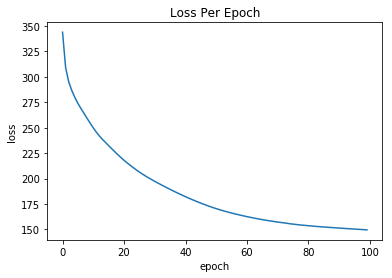

In [60]:
losses = results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

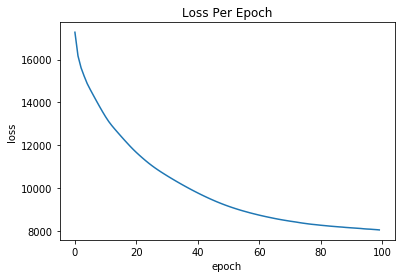

In [61]:
losses = results['validation_losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [62]:
results['eval_summary']

{'mean_rank': 0.04254038127338024,
 'hits@k': {'1': 0.020402842057232255,
  '3': 0.03995828172870087,
  '5': 0.054429307085587644,
  '10': 0.08210025422071573},
 'precision': 0.6682993415770033,
 'recall': 0.5425330812854442,
 'accuracy': 0.6363310173859151,
 'f1_score': 0.5988846914912753}

    config = dict(
        training_set_path           = train_path,
        test_set_path               = test_path,
        execution_mode              = 'Training_mode',
        random_seed                 = 2,
        kg_embedding_model_name     = 'Region',
        embedding_dim               = 100,
        scoring_function            = 1,  # corresponds to L1 
        normalization_of_entities   = 2,  # corresponds to L2
        init_radius                 = 1,
        reg_lambda                  = 2,
        margin_loss                 = 0,
        learning_rate               = 0.1,
        num_epochs                  = 100,  
        batch_size                  = 1024,
        filter_negative_triples     = True,
        preferred_device            = 'gpu'
    )

In [ ]:
losses = losses[:30]
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [ ]:
results.results['eval_summary']